In [48]:
#import custom module with defined functions
from kinase_module import *


In [156]:
# imports
from __future__ import print_function
import warnings; warnings.simplefilter('ignore')
import sys
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate as cv
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import GradientBoostingRegressor as gb
from sklearn.svm import SVC
from sklearn.linear_model import ElasticNet as en
from sklearn import preprocessing
from sklearn.linear_model import Lasso as las
from sklearn.linear_model import BayesianRidge as br
from sklearn.preprocessing import StandardScaler as sc
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

In [100]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:
import numpy as np



def add_gausian(y,mu,sigma):
    noise = np.random.normal(mu,sigma,[1381, 117])
    df_aug = df +noise 
    df_new = pd.concat([df,df_aug])
    return(df_new)

def drop_corr(df):
    '''Function drops highly correlated columns above a 0.95 threshold and outputs a new dataframe.

    Input:
        df: pandas DataFrame
        '''
    import numpy as np
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column]>0.95)]
    df_new = df.drop(df[to_drop],axis = 1)
    return(df_new)

def model_eval(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    model_score = model.score(X_test,y_test)
    model_mse =  mse(y_test,pred)
    model_r2 =r2(y_test,pred)
    return(model_mse, model_r2)

In [101]:

#Data frame
#pd.read_csv('~/Desktop/data/kinase_files/KinaseP00533.csv')
df = pd.read_csv('~/Desktop/data/kinase_files/KinaseO00329.csv')
df.head()

,Unnamed: 0,target_id,pAc,smiles,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,0,O00329,1.4,CS(=O)(=O)C1=CN=CC(=C1)C2=CC3=NC(=NN3C=C2)N,0.7770,73.7402,114.564286,103.24,289.320,289.063346,...,0,0,1,2,0,0,0,0,2,1
1,1,O00329,1.5,C1=CN2C(=NC(=N2)N)C=C1C3=CC(=CN=C3)S(=O)(=O)N,0.0209,72.0036,113.674613,129.26,290.308,290.058595,...,0,0,1,2,0,0,0,0,2,1
2,2,O00329,1.5,CC(C)NS(=O)(=O)C1=CN=CC(=C1)C2=CC3=NC(=NN3C=C2)N,1.0602,86.0879,132.979410,115.27,332.389,332.105545,...,0,0,1,2,0,0,0,0,2,1
3,3,O00329,1.5,CC1(CCN1S(=O)(=O)C2=CN=CC(=C2)C3=CC4=NC(=NN4C=...,1.5465,93.2182,144.913435,106.48,358.427,358.121195,...,0,1,1,2,0,0,0,0,2,1
4,4,O00329,1.5,CC(C)(C(F)(F)F)NS(=O)(=O)C1=CN=CC(=C1)C2=CC3=N...,1.9927,91.0859,151.840959,115.27,400.386,400.092929,...,0,0,1,2,0,0,0,0,2,1


In [102]:
#Check the shape of the dataframe
df.shape

(1381, 120)

In [103]:
drop_corr(df).head()

,Unnamed: 0,target_id,smiles,SlogP,SMR,TPSA,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,...,MQN32,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41
0,0,O00329,CS(=O)(=O)C1=CN=CC(=C1)C2=CC3=NC(=NN3C=C2)N,0.7770,73.7402,103.24,7,2,2,1,...,0,0,0,1,2,0,0,0,0,2
1,1,O00329,C1=CN2C(=NC(=N2)N)C=C1C3=CC(=CN=C3)S(=O)(=O)N,0.0209,72.0036,129.26,8,4,2,2,...,0,0,0,1,2,0,0,0,0,2
2,2,O00329,CC(C)NS(=O)(=O)C1=CN=CC(=C1)C2=CC3=NC(=NN3C=C2)N,1.0602,86.0879,115.27,8,3,4,2,...,0,0,0,1,2,0,0,0,0,2
3,3,O00329,CC1(CCN1S(=O)(=O)C2=CN=CC(=C2)C3=CC4=NC(=NN4C=...,1.5465,93.2182,106.48,8,2,3,1,...,1,0,1,1,2,0,0,0,0,2
4,4,O00329,CC(C)(C(F)(F)F)NS(=O)(=O)C1=CN=CC(=C1)C2=CC3=N...,1.9927,91.0859,115.27,8,3,4,2,...,0,0,0,1,2,0,0,0,0,2


In [104]:
drop_corr(df).shape

(1381, 93)

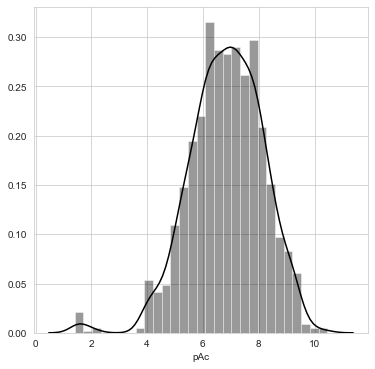

In [105]:
#Plot distribution of the pAc with the density estimation function
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df.pAc,color = 'black');
sns.set_style("whitegrid")

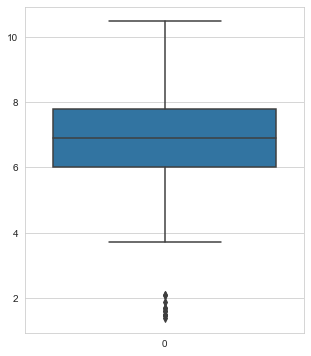

In [106]:
#Boxplot of pAc,It has a few outliers but the distribution in fairly normal
f, ax = plt.subplots(figsize=(5, 6))
sns.set_style("whitegrid")
data = df.pAc
sns.boxplot(data=data);

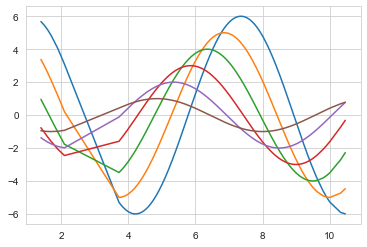

In [107]:
def sinplot(flip=1):
    x = df.pAc
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

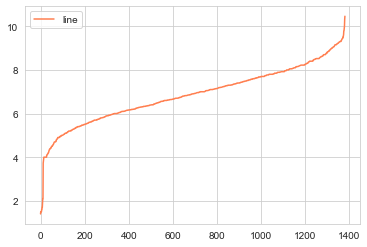

In [108]:
#line plot
ax = sns.lineplot(data=df["pAc"], color="coral", label="line")

In [109]:
#Drop unwanted colum(unnamed)
df = df.drop(['Unnamed: 0','smiles','target_id'], axis=1)
df.head()

,pAc,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,1.4,0.7770,73.7402,114.564286,103.24,289.320,289.063346,7,2,2,...,0,0,1,2,0,0,0,0,2,1
1,1.5,0.0209,72.0036,113.674613,129.26,290.308,290.058595,8,4,2,...,0,0,1,2,0,0,0,0,2,1
2,1.5,1.0602,86.0879,132.979410,115.27,332.389,332.105545,8,3,4,...,0,0,1,2,0,0,0,0,2,1
3,1.5,1.5465,93.2182,144.913435,106.48,358.427,358.121195,8,2,3,...,0,1,1,2,0,0,0,0,2,1
4,1.5,1.9927,91.0859,151.840959,115.27,400.386,400.092929,8,3,4,...,0,0,1,2,0,0,0,0,2,1


In [110]:
df.shape

(1381, 117)

In [ ]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df["pAc"].values

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [162]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

[ -3.60083267 -35.7103994  -51.71234042 -36.97056124 -36.20025333
 -50.21142846 -30.96482526 -49.37135309 -32.04027164 -12.64250788]


-33.94247733778403

In [122]:
#Model with Random forest
print(model_eval(rf()))

(0.6891686969456058, 0.5714214954756922)


In [131]:
#Add noise of 0.01 to the dataframe
df1 = add_gausian(df,0,0.1)

df1.shape

(2762, 117)

In [159]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df1.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df1["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [133]:

print(model_eval(rf()))

(0.4320308618332386, 0.7233057525725659)


In [160]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

[ -1.3688289  -10.26622113  -9.49514385  -7.54617006  -1.00551348
  -0.29118102  -3.40389871  -4.70878899  -3.82921689  -2.13150451]


-4.4046467532674995

In [135]:
#Add noise of 0.02 to the dataframe
df2 = add_gausian(df,0,0.2)
df2 = pd.concat([df,df2])
df2.shape

(4143, 117)

In [163]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df2.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df2["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [138]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df2.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df2["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
print(model_eval(rf()))

(0.3114170713408147, 0.8264069912432067)


In [164]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

[ 0.77940112  0.26388478  0.45895966  0.96512848  0.21679387  0.38514574
  0.85401964 -1.89168926 -1.21159929 -0.69754265]


0.012250209652038668

In [145]:
#Add noise of 0.03 to the dataframe
df3 = add_gausian(df,0,0.3)
df3 = pd.concat([df2,df3])
df3.shape

(6905, 117)

In [168]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df3.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df3["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [146]:
print(model_eval(rf()))

(0.17266241502061602, 0.8994661290180129)


In [169]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

[0.97005153 0.96452327 0.97387719 0.95416913 0.60717439 0.62894885
 0.9741398  0.92936534 0.45652396 0.36320929]


0.782198273872312

In [148]:
#Add noise of 0.04 to the dataframe
df4 = add_gausian(df,0,0.4)
df4 = pd.concat([df3,df4])
df4.shape

(9667, 117)

In [165]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df4.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df4["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [149]:
print(model_eval(rf()))

(0.1462987490272286, 0.9136028400063801)


In [166]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

[0.99077299 0.99593217 0.96619891 0.75576436 0.97551636 0.92913481
 0.62103906 0.97562765 0.89804518 0.52588275]


0.8633914236013297

In [152]:
#Add noise of 0.05 to the dataframe
df5 = add_gausian(df,0,0.5)
df5 = pd.concat([df4,df5])
df5.shape

(12429, 117)

In [ ]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df5.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df5["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [153]:
print(model_eval(rf()))

(0.16307904076547838, 0.9060345366532899)


In [167]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

[0.99068228 0.99586097 0.97012535 0.76231935 0.97203005 0.9291508
 0.63203791 0.97444034 0.89511129 0.52912159]


0.8650879928582436